# The Billionaire’s Data-Driven Will (Beginner Visualization Project)

## Problem Statement

A billionaire with a global business empire wants his legacy to be guided by evidence, not sentiment. As he prepares his will, he refuses to rely on family politics or gut instinct. For years he has tracked detailed data on his nuclear and extended family as well as his most loyal long-serving employees—capturing factors such as financial responsibility, past contributions, loyalty, and leadership potential.

The challenge is to analyze this information and build a transparent, defensible framework for distributing his wealth and appointing key stewards of his assets. The analysis must highlight patterns, rank potential heirs and managers, and provide clear visual evidence that supports each recommendation. The goal is to move from an emotional, subjective process to a quantitative decision, ensuring his fortune is managed responsibly and his legacy preserved worldwide.


## Datasets & Column Meanings

### `people.csv` — Observations about potential heirs and trusted employees
| Column | Meaning |
|---|---|
| **person_id** | Unique identifier for each person. |
| **name** | First and last name. |
| **group** | Relationship to the billionaire: `nuclear_family`, `extended_family`, or `employee`. |
| **age** | Age in years. |
| **country** | Country of residence. |
| **financial_responsibility** | Score (0–100) for how reliably they handle money. |
| **loyalty_score** | Score (0–100) for dedication and trustworthiness. |
| **leadership_potential** | Score (0–100) estimating ability to run companies or major assets. |
| **philanthropy_alignment** | Score (0–100) for how well their values match the billionaire’s giving goals. |
| **legal_flags** | 0 = clean record, 1 = some legal issue present. |

### `assets_updated.csv` — The billionaire’s portfolio of major assets
| Column | Meaning |
|---|---|
| **asset_id** | Unique identifier for each asset. |
| **asset_name** | Descriptive name of the asset. |
| **asset_type** | Category of the asset: `cash`, `stocks`, `real_estate`, `business_unit`, or `art_collection`. |
| **region** | Global region of the asset: `North America`, `Europe`, `Africa`, `Asia`, or `Latin America`. |
| **current_value_million_usd** | Estimated value **in millions of US dollars**. |
| **risk_level** | Overall investment risk: `Low`, `Medium`, or `High`. |
| **liquidity** | How easily the asset can be converted to cash: `High`, `Medium`, or `Low`. |
| **mgmt_expertise_required** | 1 if the asset needs active management; 0 if it can be passively held. |

## Load Libraries and Data Set

In [1]:
import pandas as pd # data manipulation
import numpy as np # mathematical calculations
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

In [4]:
people_df = pd.read_csv('/content/people.csv')
asset_df = pd.read_csv('/content/assets_updated.csv')

In [5]:
print()
display(people_df.head())
print()
display(asset_df.head())

,person_id,name,group,age,country,financial_responsibility,loyalty_score,leadership_potential,philanthropy_alignment,legal_flags
0,1,Olivia Carter,employee,56,UK,91,68,44,90,0
1,2,Marcus Langley,nuclear_family,75,Brazil,58,62,53,32,0
2,3,Rebecca Ortiz,nuclear_family,19,India,63,83,59,67,0
3,4,Daniel Smith,nuclear_family,77,UK,60,72,87,51,0
4,5,Priya Patel,employee,42,South Africa,88,66,88,71,0


,asset_id,asset_name,asset_type,region,current_value_million_usd,risk_level,liquidity,mgmt_expertise_required
0,1,Global Tech Stocks,stocks,Asia,144.06,Medium,Medium,1
1,2,Paris Luxury Hotel,stocks,Europe,74.76,Medium,High,1
2,3,Kenyan Tea Plantation,cash,Asia,41.90,Low,Medium,1
3,4,Silicon Valley Startup Shares,real_estate,Latin America,387.26,Medium,High,0
4,5,Dubai Art Collection,business_unit,Latin America,7.73,Low,Medium,1


### Quickly explore the data

In [6]:
people_df.shape

(15, 10)

In [7]:
asset_df.shape

(10, 8)

In [8]:
people_df.isnull().sum()

,0
person_id,0
name,0
group,0
age,0
country,0
financial_responsibility,0
loyalty_score,0
leadership_potential,0
philanthropy_alignment,0
legal_flags,0


In [9]:
asset_df.isnull().sum()

,0
asset_id,0
asset_name,0
asset_type,0
region,0
current_value_million_usd,0
risk_level,0
liquidity,0
mgmt_expertise_required,0


In [10]:
asset_df.isna().sum()

,0
asset_id,0
asset_name,0
asset_type,0
region,0
current_value_million_usd,0
risk_level,0
liquidity,0
mgmt_expertise_required,0


In [11]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   person_id                 15 non-null     int64 
 1   name                      15 non-null     object
 2   group                     15 non-null     object
 3   age                       15 non-null     int64 
 4   country                   15 non-null     object
 5   financial_responsibility  15 non-null     int64 
 6   loyalty_score             15 non-null     int64 
 7   leadership_potential      15 non-null     int64 
 8   philanthropy_alignment    15 non-null     int64 
 9   legal_flags               15 non-null     int64 
dtypes: int64(7), object(3)
memory usage: 1.3+ KB


In [12]:
asset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   asset_id                   10 non-null     int64  
 1   asset_name                 10 non-null     object 
 2   asset_type                 10 non-null     object 
 3   region                     10 non-null     object 
 4   current_value_million_usd  10 non-null     float64
 5   risk_level                 10 non-null     object 
 6   liquidity                  10 non-null     object 
 7   mgmt_expertise_required    10 non-null     int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 772.0+ bytes


In [13]:
people_df.duplicated().sum()

np.int64(0)

In [14]:
asset_df.duplicated().sum()

np.int64(0)

To display more information about a function use `shift` + `tab` keys

In [15]:
people_df.select_dtypes(exclude='number')

,name,group,country
0,Olivia Carter,employee,UK
1,Marcus Langley,nuclear_family,Brazil
2,Rebecca Ortiz,nuclear_family,India
3,Daniel Smith,nuclear_family,UK
4,Priya Patel,employee,South Africa
5,Li Wei,nuclear_family,Australia
6,Amara Okafor,extended_family,USA
7,Carlos Mendes,nuclear_family,UK
8,Fatima Zahra,nuclear_family,India
9,John Doe,employee,Australia


In [16]:
people_df.describe()

,person_id,age,financial_responsibility,loyalty_score,leadership_potential,philanthropy_alignment,legal_flags
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,8.000000,52.533333,68.333333,73.600000,70.333333,67.400000,0.200000
std,4.472136,21.266562,15.069679,17.070442,21.750753,20.109699,0.414039
min,1.000000,19.000000,45.000000,48.000000,33.000000,32.000000,0.000000
25%,4.500000,38.500000,57.500000,58.000000,56.000000,52.000000,0.000000
50%,8.000000,56.000000,63.000000,72.000000,68.000000,71.000000,0.000000
75%,11.500000,71.500000,84.500000,87.500000,89.500000,82.500000,0.000000
max,15.000000,77.000000,91.000000,99.000000,100.000000,91.000000,1.000000


In [17]:
people_df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_id,15.0,8.000000,4.472136,1.0,4.5,8.0,11.5,15.0
age,15.0,52.533333,21.266562,19.0,38.5,56.0,71.5,77.0
financial_responsibility,15.0,68.333333,15.069679,45.0,57.5,63.0,84.5,91.0
loyalty_score,15.0,73.600000,17.070442,48.0,58.0,72.0,87.5,99.0
leadership_potential,15.0,70.333333,21.750753,33.0,56.0,68.0,89.5,100.0
philanthropy_alignment,15.0,67.400000,20.109699,32.0,52.0,71.0,82.5,91.0
legal_flags,15.0,0.200000,0.414039,0.0,0.0,0.0,0.0,1.0


In [18]:
asset_df.describe()

,asset_id,current_value_million_usd,mgmt_expertise_required
count,10.00000,10.000000,10.000000
mean,5.50000,218.085000,0.600000
std,3.02765,158.699176,0.516398
min,1.00000,7.730000,0.000000
25%,3.25000,92.085000,0.000000
50%,5.50000,175.615000,1.000000
75%,7.75000,378.807500,1.000000
max,10.00000,432.240000,1.000000


In [19]:
asset_df.describe().T

,count,mean,std,min,25%,50%,75%,max
asset_id,10.0,5.500,3.027650,1.00,3.250,5.500,7.7500,10.00
current_value_million_usd,10.0,218.085,158.699176,7.73,92.085,175.615,378.8075,432.24
mgmt_expertise_required,10.0,0.600,0.516398,0.00,0.000,1.000,1.0000,1.00


## Let's Explore more and Visualize

Peoplese Data set

In [20]:
people_df['age']

,age
0,56
1,75
2,19
3,77
4,42
5,77
6,68
7,24
8,77
9,45


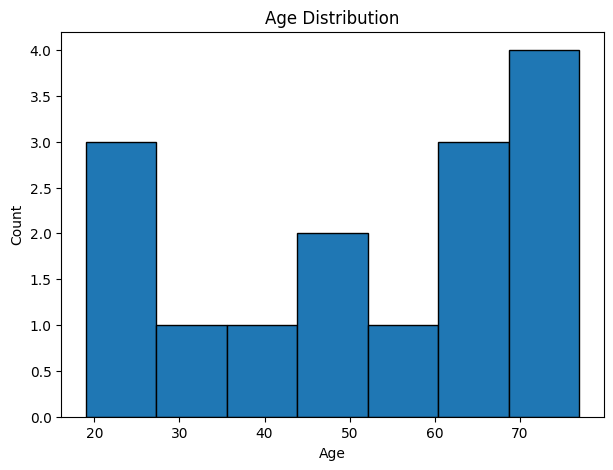

In [21]:
plt.figure(figsize=(7, 5))
plt.hist(people_df['age'], bins=7, edgecolor='black')
plt.title("Age Distribution")
plt.ylabel("Count")
plt.xlabel("Age")
plt.show()

### People By Group

In [22]:
people_df['group'].value_counts()

,count
group,
nuclear_family,8
extended_family,4
employee,3


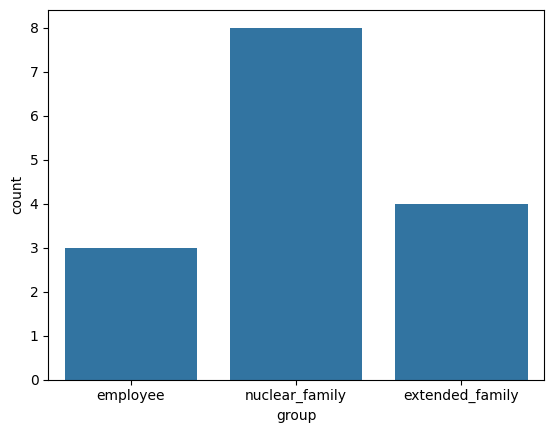

In [23]:
sns.countplot(x='group', data=people_df)
plt.show()

In [24]:
people_df['country'].value_counts().index

Index(['UK', 'India', 'Australia', 'South Africa', 'USA', 'Brazil'], dtype='object', name='country')

<Axes: xlabel='country', ylabel='count'>

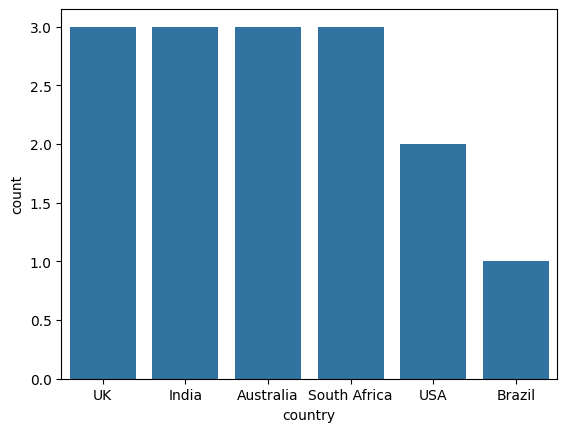

In [25]:
order = people_df['country'].value_counts().index

sns.countplot(x='country', data=people_df, order=order)

In [26]:
people_df.columns

Index(['person_id', 'name', 'group', 'age', 'country',
       'financial_responsibility', 'loyalty_score', 'leadership_potential',
       'philanthropy_alignment', 'legal_flags'],
      dtype='object')

In [ ]:
people_df[['financial_responsibility', 'loyalty_score', 'leadership_potential','philanthropy_alignment']]

In [27]:
corr_columns = ['financial_responsibility', 'loyalty_score', 'leadership_potential','philanthropy_alignment']
corr_df = people_df[corr_columns].corr()
corr_df

,financial_responsibility,loyalty_score,leadership_potential,philanthropy_alignment
financial_responsibility,1.000000,-0.087187,0.450292,0.027106
loyalty_score,-0.087187,1.000000,-0.094265,0.012360
leadership_potential,0.450292,-0.094265,1.000000,-0.279573
philanthropy_alignment,0.027106,0.012360,-0.279573,1.000000


<Axes: >

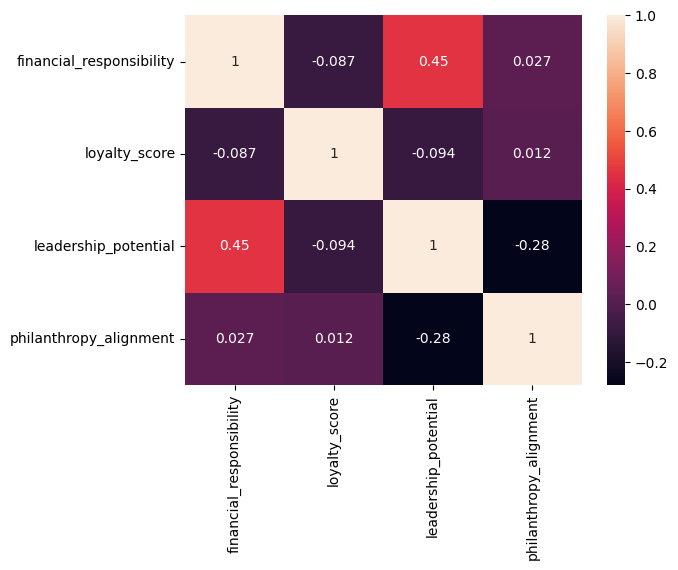

In [28]:
sns.heatmap(corr_df, annot=True)

In [29]:
people_df.head()

,person_id,name,group,age,country,financial_responsibility,loyalty_score,leadership_potential,philanthropy_alignment,legal_flags
0,1,Olivia Carter,employee,56,UK,91,68,44,90,0
1,2,Marcus Langley,nuclear_family,75,Brazil,58,62,53,32,0
2,3,Rebecca Ortiz,nuclear_family,19,India,63,83,59,67,0
3,4,Daniel Smith,nuclear_family,77,UK,60,72,87,51,0
4,5,Priya Patel,employee,42,South Africa,88,66,88,71,0


Text(0, 0.5, 'F/R')

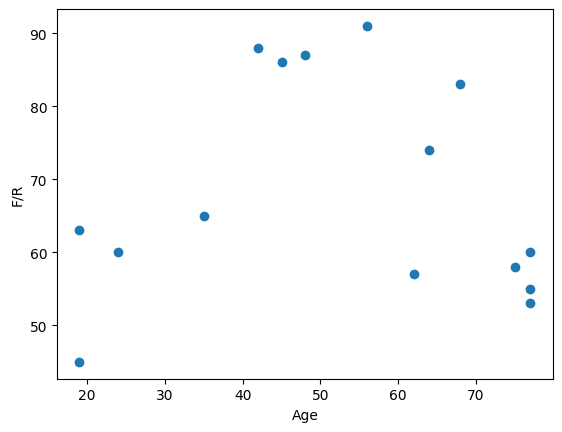

In [30]:
plt.scatter(x='age', y='financial_responsibility', data=people_df)
plt.xlabel("Age")
plt.ylabel("F/R")

### Assests Data

In [31]:
asset_df.head()

,asset_id,asset_name,asset_type,region,current_value_million_usd,risk_level,liquidity,mgmt_expertise_required
0,1,Global Tech Stocks,stocks,Asia,144.06,Medium,Medium,1
1,2,Paris Luxury Hotel,stocks,Europe,74.76,Medium,High,1
2,3,Kenyan Tea Plantation,cash,Asia,41.90,Low,Medium,1
3,4,Silicon Valley Startup Shares,real_estate,Latin America,387.26,Medium,High,0
4,5,Dubai Art Collection,business_unit,Latin America,7.73,Low,Medium,1


In [33]:
asset_type = asset_df.groupby(['asset_type'])['current_value_million_usd'].sum().sort_values(ascending=False)

In [34]:
asset_type

,current_value_million_usd
asset_type,
real_estate,819.50
cash,579.23
art_collection,386.78
stocks,218.82
business_unit,176.52


In [35]:
asset_type.index

Index(['real_estate', 'cash', 'art_collection', 'stocks', 'business_unit'], dtype='object', name='asset_type')

In [ ]:
asset_type.values

array([819.5 , 579.23, 386.78, 218.82, 176.52])

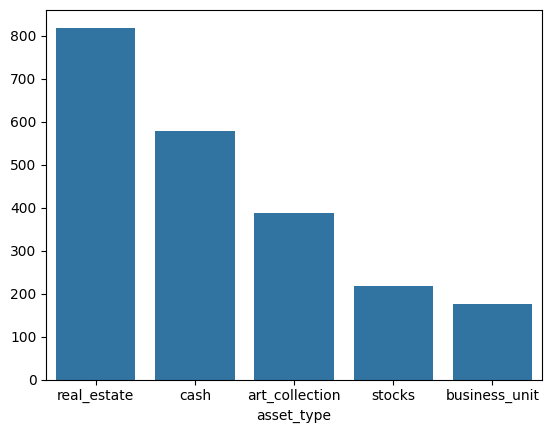

In [36]:
sns.barplot(x=asset_type.index, y=asset_type.values)
plt.show()

In [37]:
people_df[people_df['group'] == 'nuclear_family'][['name', 'group']]

,name,group
1,Marcus Langley,nuclear_family
2,Rebecca Ortiz,nuclear_family
3,Daniel Smith,nuclear_family
5,Li Wei,nuclear_family
7,Carlos Mendes,nuclear_family
8,Fatima Zahra,nuclear_family
10,Sophia Brown,nuclear_family
11,Ahmed Khan,nuclear_family


- age >= 60
- financial_responsibility >= 80
- loyalty_score > 70
- leadership_potential >= 70
- philanthropy_alignment

In [38]:
people_df

,person_id,name,group,age,country,financial_responsibility,loyalty_score,leadership_potential,philanthropy_alignment,legal_flags
0,1,Olivia Carter,employee,56,UK,91,68,44,90,0
1,2,Marcus Langley,nuclear_family,75,Brazil,58,62,53,32,0
2,3,Rebecca Ortiz,nuclear_family,19,India,63,83,59,67,0
3,4,Daniel Smith,nuclear_family,77,UK,60,72,87,51,0
4,5,Priya Patel,employee,42,South Africa,88,66,88,71,0
5,6,Li Wei,nuclear_family,77,Australia,55,54,91,91,0
6,7,Amara Okafor,extended_family,68,USA,83,94,93,32,1
7,8,Carlos Mendes,nuclear_family,24,UK,60,48,68,47,1
8,9,Fatima Zahra,nuclear_family,77,India,53,89,38,82,0
9,10,John Doe,employee,45,Australia,86,99,100,73,0


In [39]:
people_df[
    (people_df['age'] >= 40) &
    (people_df['financial_responsibility'] >= 60) &
    (people_df['loyalty_score'] >= 60) &
    (people_df['leadership_potential'] >= 60) &
    (people_df['philanthropy_alignment'] >= 60) &
    (people_df['legal_flags'] == 0)
]

,person_id,name,group,age,country,financial_responsibility,loyalty_score,leadership_potential,philanthropy_alignment,legal_flags
4,5,Priya Patel,employee,42,South Africa,88,66,88,71,0
9,10,John Doe,employee,45,Australia,86,99,100,73,0
